## Loading libraries

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mutual_info_score

## Data Reading

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
for col in data.columns:
    if data.dtypes[col] == 'object':
        print('Col: {} - type {} - unique values: {}'.format(col,data.dtypes[col],data[col].unique()))

Col: customerID - type object - unique values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Col: gender - type object - unique values: ['Female' 'Male']
Col: Partner - type object - unique values: ['Yes' 'No']
Col: Dependents - type object - unique values: ['No' 'Yes']
Col: PhoneService - type object - unique values: ['No' 'Yes']
Col: MultipleLines - type object - unique values: ['No phone service' 'No' 'Yes']
Col: InternetService - type object - unique values: ['DSL' 'Fiber optic' 'No']
Col: OnlineSecurity - type object - unique values: ['No' 'Yes' 'No internet service']
Col: OnlineBackup - type object - unique values: ['Yes' 'No' 'No internet service']
Col: DeviceProtection - type object - unique values: ['No' 'Yes' 'No internet service']
Col: TechSupport - type object - unique values: ['No' 'Yes' 'No internet service']
Col: StreamingTV - type object - unique values: ['No' 'Yes' 'No internet service']
Col: StreamingMovies - type object - unique

- **we observe that the column TotalCharges was wrongly detected as an object. This column represents the total amount charged to the customer, so we are going to convert it to a numeric variable.**

In [7]:
data.TotalCharges = pd.to_numeric(data.TotalCharges,errors='coerce')

In [8]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- **We can now observe that the column TotalCharges has 11 missing values.**

In [10]:
data[data.TotalCharges.isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


- **These observations have also a tenure of 0, even though MontlyCharges is not null for these entries. This information appeared to be contradictory, and therefore, we decide to remove those observations from the data set.**

In [11]:
data.dropna(inplace=True)

In [12]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
data.drop(columns='customerID',inplace=True)

In [14]:
def categoriesFeatures(data):
    for col in data.columns:
        if data.dtypes[col] == 'object':
            print('Col: {} - Values: {}'.format(col, data[col].unique()))

In [15]:
categoriesFeatures(data)

Col: gender - Values: ['Female' 'Male']
Col: Partner - Values: ['Yes' 'No']
Col: Dependents - Values: ['No' 'Yes']
Col: PhoneService - Values: ['No' 'Yes']
Col: MultipleLines - Values: ['No phone service' 'No' 'Yes']
Col: InternetService - Values: ['DSL' 'Fiber optic' 'No']
Col: OnlineSecurity - Values: ['No' 'Yes' 'No internet service']
Col: OnlineBackup - Values: ['Yes' 'No' 'No internet service']
Col: DeviceProtection - Values: ['No' 'Yes' 'No internet service']
Col: TechSupport - Values: ['No' 'Yes' 'No internet service']
Col: StreamingTV - Values: ['No' 'Yes' 'No internet service']
Col: StreamingMovies - Values: ['No' 'Yes' 'No internet service']
Col: Contract - Values: ['Month-to-month' 'One year' 'Two year']
Col: PaperlessBilling - Values: ['Yes' 'No']
Col: PaymentMethod - Values: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Col: Churn - Values: ['No' 'Yes']


In [16]:
data.PaymentMethod = data.PaymentMethod.apply(lambda x: x.replace(' (automatic)',''))

In [17]:
data.replace('No internet service','No',inplace=True)
data.replace('No phone service','No',inplace=True)

In [18]:
categoriesFeatures(data)

Col: gender - Values: ['Female' 'Male']
Col: Partner - Values: ['Yes' 'No']
Col: Dependents - Values: ['No' 'Yes']
Col: PhoneService - Values: ['No' 'Yes']
Col: MultipleLines - Values: ['No' 'Yes']
Col: InternetService - Values: ['DSL' 'Fiber optic' 'No']
Col: OnlineSecurity - Values: ['No' 'Yes']
Col: OnlineBackup - Values: ['Yes' 'No']
Col: DeviceProtection - Values: ['No' 'Yes']
Col: TechSupport - Values: ['No' 'Yes']
Col: StreamingTV - Values: ['No' 'Yes']
Col: StreamingMovies - Values: ['No' 'Yes']
Col: Contract - Values: ['Month-to-month' 'One year' 'Two year']
Col: PaperlessBilling - Values: ['Yes' 'No']
Col: PaymentMethod - Values: ['Electronic check' 'Mailed check' 'Bank transfer' 'Credit card']
Col: Churn - Values: ['No' 'Yes']


## Data Visualization

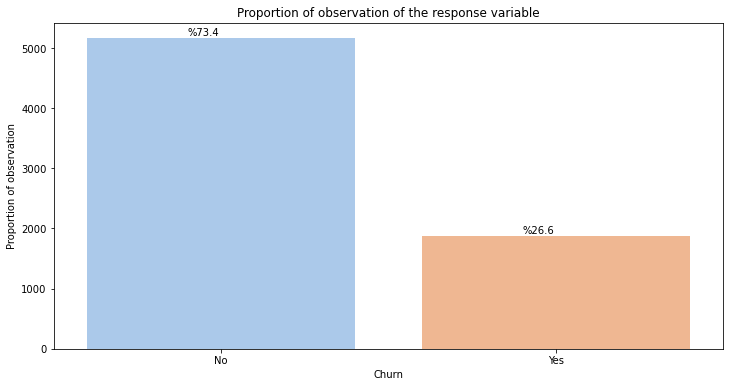

In [23]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=data, x='Churn', palette='pastel')
plt.title('Proportion of observation of the response variable')
plt.xlabel('Churn')
plt.ylabel('Proportion of observation')
for p in ax.patches:
        ax.annotate('%{:.1f}'.format(100*p.get_height()/len(data)), (p.get_x()+0.3, p.get_height()+50))

- **As shown above, this is an imbalanced data set because both classes are not equally distributed among all observations, being no the majority class (73.4%).**

In [59]:
def countplot_of_a_feature(col):
    plt.figure(figsize=(12,6))
    ax = sns.countplot(data=data, x=col, hue='Churn', palette='pastel')
    plt.title('Proportion of observation of the ' + col + ' variable')
    plt.xlabel(col)
    plt.ylabel('Proportion of observation')
    for p in ax.patches:
            ax.annotate('%{:.1f}'.format(100*p.get_height()/len(data)), (p.get_x()+0.15, p.get_height()+20))

In [60]:
demographic_attributes = ['Partner',
            'Dependents',
            'SeniorCitizen',
            'gender'
           ]

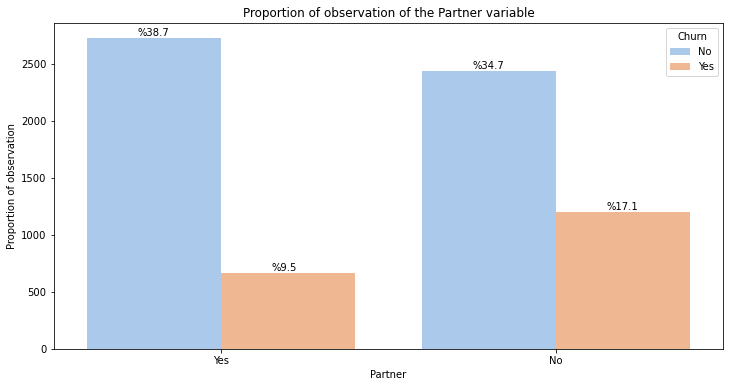

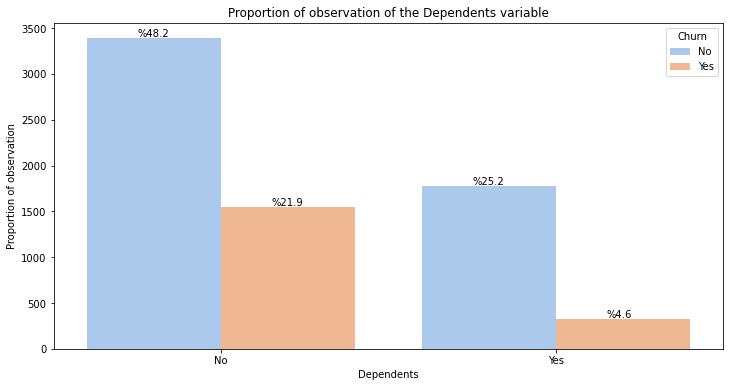

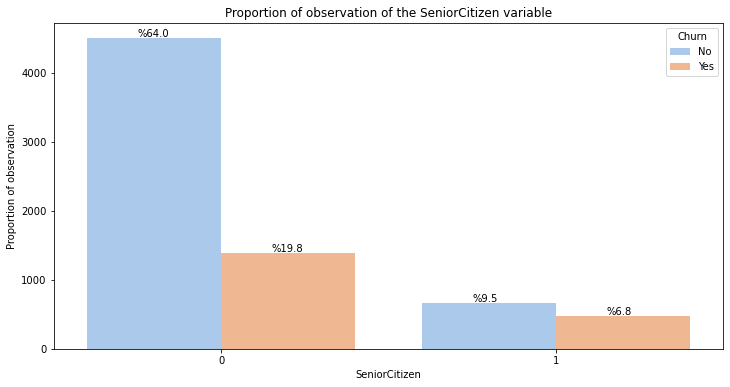

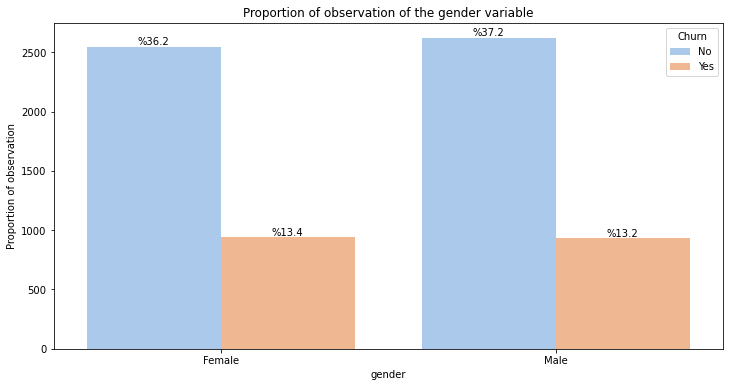

In [61]:
for col in demographic_attributes:
    countplot_of_a_feature(col)

**We can extract the following conclusions by analyzing demographic attributes:**
- **Customers with a partner churn less than customers with no partner.**
- **Customers with a dependents churn less than customers with no dependents.**
- **The churn rate of senior citizens is almost double that of young citizens.**
- **A similar percentage of churn is shown both when a customer is a man or a woman.**

In [62]:
def pieplot_of_a_Feature(col,labels,title):
    plt.figure(figsize=(12,6))
    colors = sns.color_palette('pastel')[0:2]
    plt.pie(data[col].value_counts()*100/len(data),labels=labels,colors=colors,autopct='%.1f%%')
    plt.title(title)
    plt.show()

In [63]:
services = ['PhoneService',
            'MultipleLines',
            'InternetService',
            'OnlineSecurity',
            'OnlineBackup',
            'DeviceProtection',
            'TechSupport',
            'StreamingTV',
            'StreamingMovies'
           ]

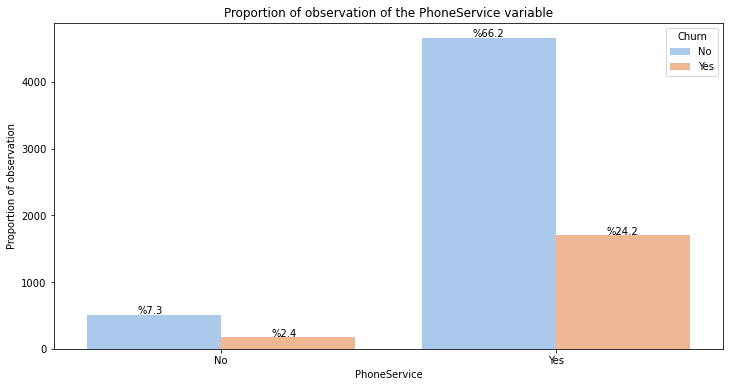

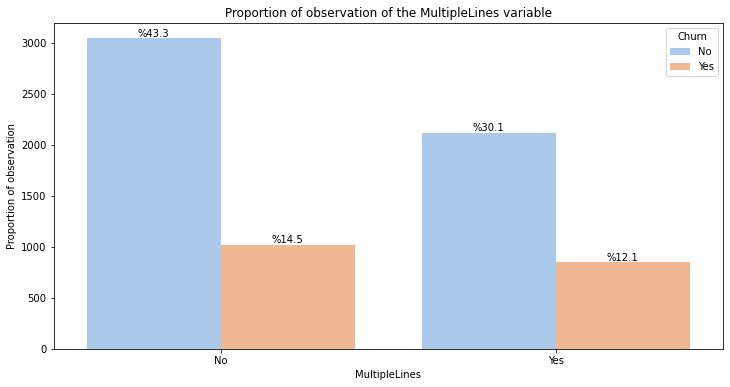

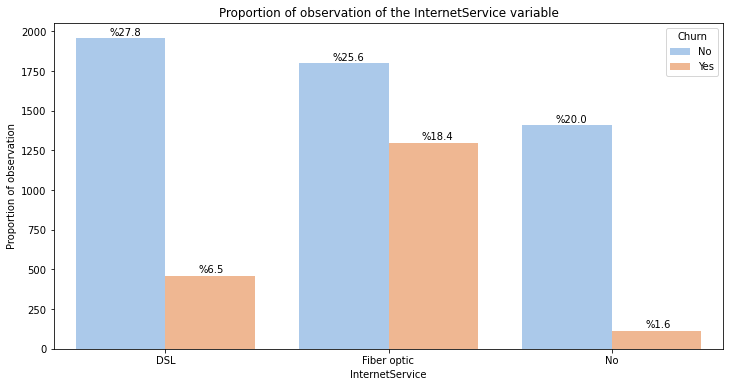

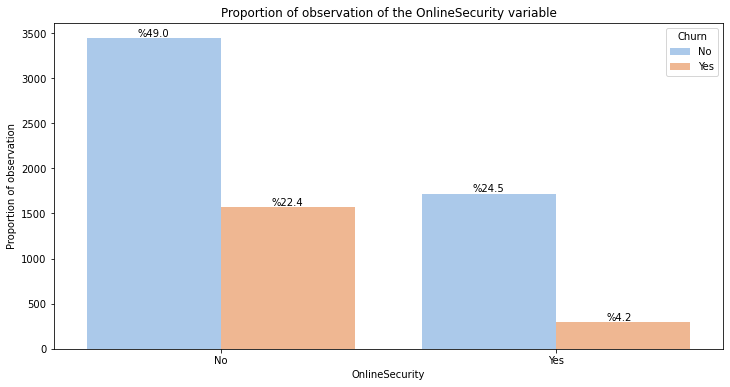

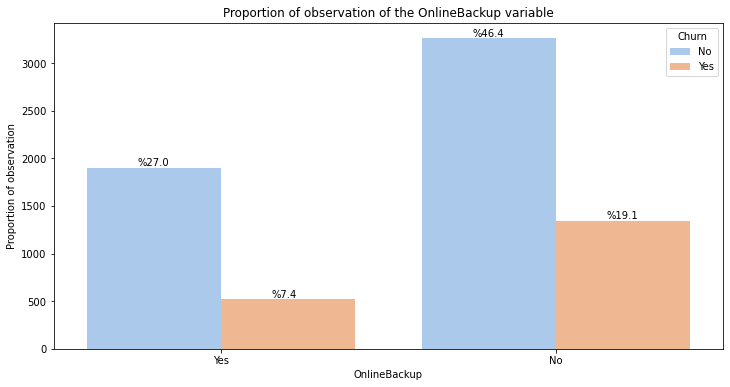

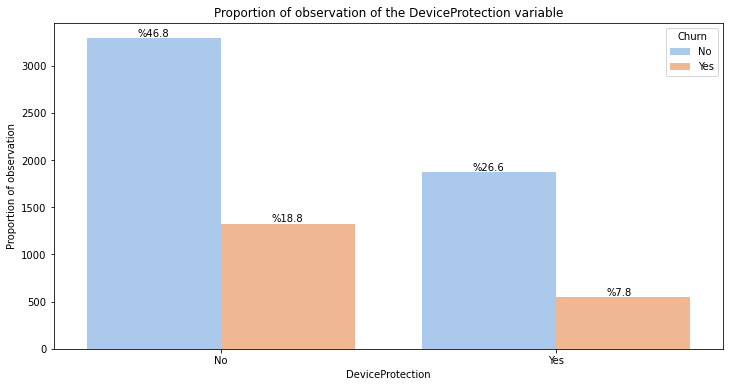

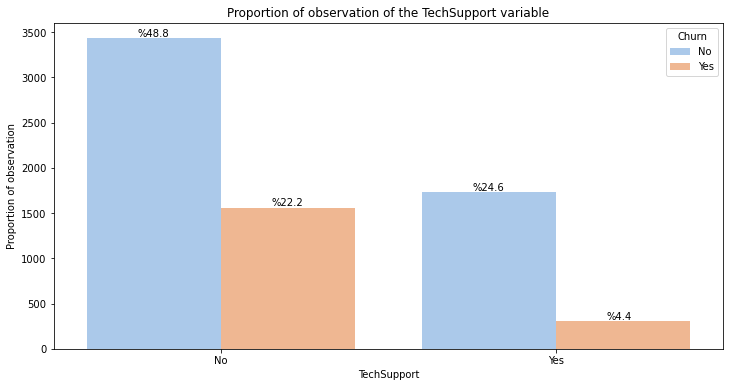

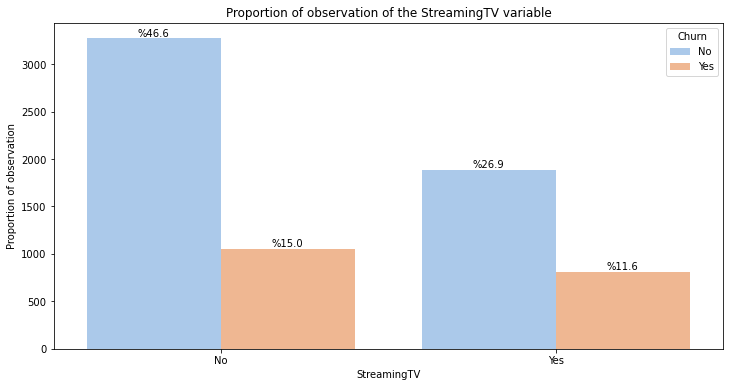

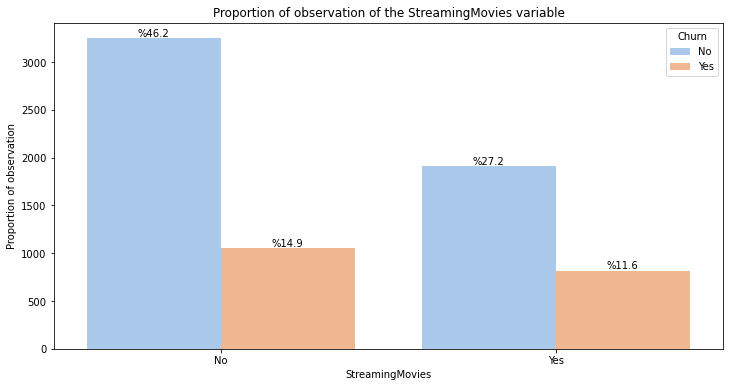

In [64]:
for service in services:
    countplot_of_a_feature(service)

**We can extract the following conclusions by evaluating services attributes:**
- **Customers with no phone service churn less than customers with phone service.**
- **The percentage of churn for those with MultipleLines is nearly the same.**
- **Customers with DSL and no intsernet service churn less than those with fibre optic.**
- **Clients with online security, online backup and DeviceProtection churn less than those without it.**
- **Customers with no tech support tend to churn more often than those with tech support.**
- **The percentage of churn for those with StreamingTV and StreamingMovies is nearly the same.**

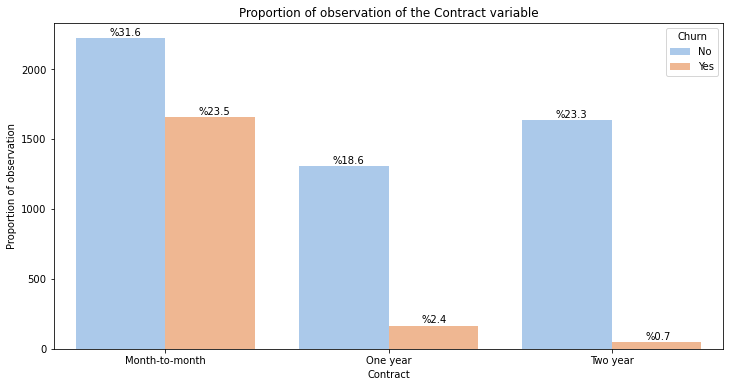

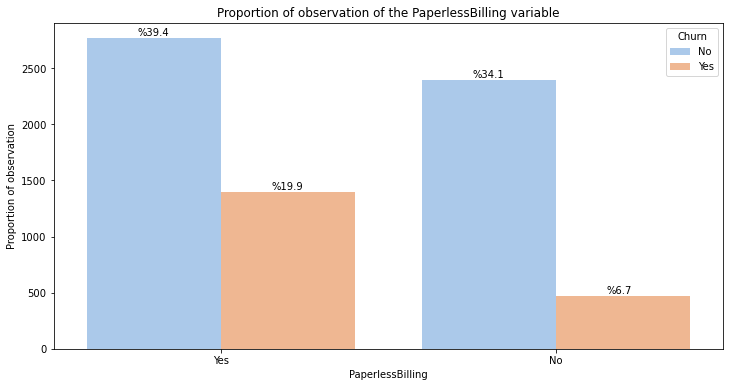

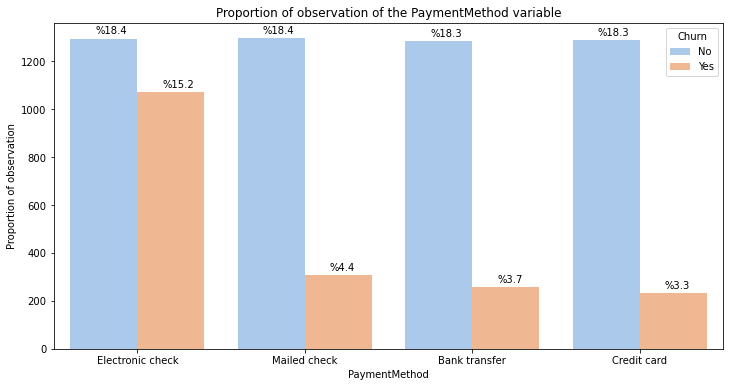

In [65]:
categories_account_attributes = ['Contract', 'PaperlessBilling','PaymentMethod']
for col in categories_account_attributes:
    countplot_of_a_feature(col)

**We can extract the following conclusions by analyzing customer account attributes:**

- **Customers with month-to-month contracts have higher churn rates compared to clients with yearly contracts.**
- **Customers subscribed to paperless billing churn more than those who are not subscribed.**
- **Customers who opted for an electronic check as paying method are more likely to leave the company.**

In [73]:
def hist_plot(col):
    sns.displot(data=data,x=col,hue='Churn')
    plt.title('Distribution of ' + col + ' by churn')
    plt.xlabel(col)
    plt.ylabel('Number of customers')
    plt.show()

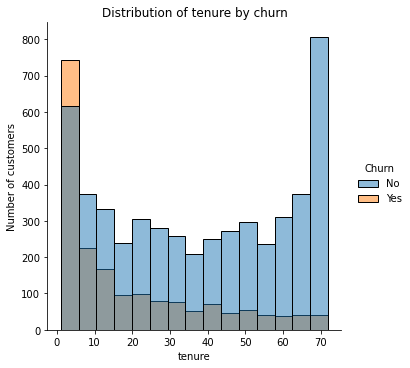

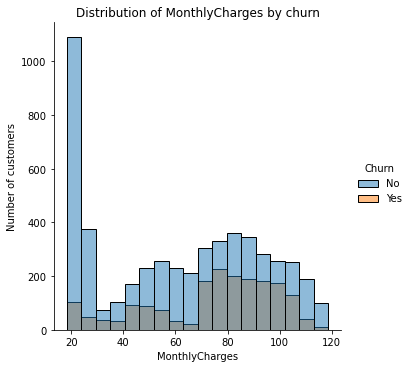

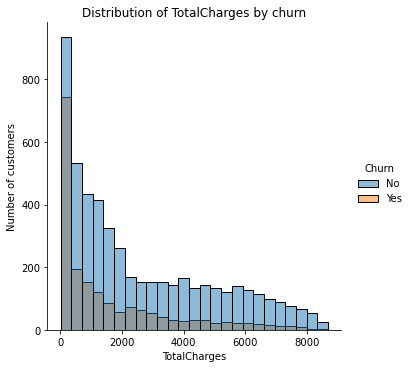

In [74]:
numericals_account_attributes = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numericals_account_attributes:
    hist_plot(col)

**We can extract the following conclusions by analyzing the histograms above:**
- **New customers (low tenure) are more likely to churn.**
- **The churn rate tends to be larger when monthly charges are high.**
- **Clients with high total charges are less likely to leave the company.**

## Feature importance

In [83]:
def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, data.Churn)

categorical_variables = data.select_dtypes(include=object).drop('Churn', axis=1)
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)
print(feature_importance)

Contract            0.098182
InternetService     0.055394
PaymentMethod       0.044423
PaperlessBilling    0.019119
OnlineSecurity      0.015891
TechSupport         0.014614
Dependents          0.014270
Partner             0.011383
OnlineBackup        0.003464
DeviceProtection    0.002230
StreamingTV         0.001983
StreamingMovies     0.001837
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64


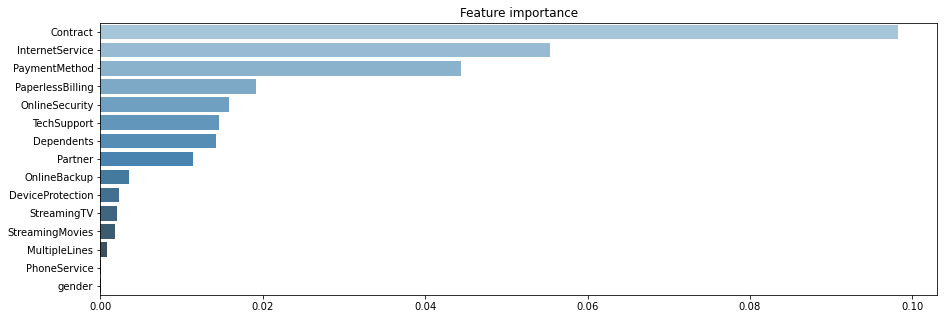

In [88]:
plt.figure(figsize=(15,5))
plt.title("Feature importance")
ax = sns.barplot(y=feature_importance.index, x=feature_importance.values, palette="Blues_d", orient='h')

- **As shown above, gender, PhoneService, and MultipleLines have a mutual information score really close to 0, meaning those variables do not have a strong relationship with the target.**

## Feature Engineering

In [89]:
data_transformed = data.copy()

label_encoding_columns = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService', 'Churn']

for column in label_encoding_columns:
    if column == 'gender':
        data_transformed[column] = data_transformed[column].map({'Female': 1, 'Male': 0})
    else: 
        data_transformed[column] = data_transformed[column].map({'Yes': 1, 'No': 0})

In [90]:
data_transformed.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,No,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer,42.30,1840.75,0
4,1,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
